<a href="https://colab.research.google.com/github/fathanzys/Data/blob/Machine-Learning/Klasifikasi-Penjualan-Obat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- **KELOMPOK 4 RFFR - DATA MINING**  -->

# **KLASIFIKASI PENJUALAN OBAT APOTEK**

#**PENDAHULUAN**

Dalam era digital saat ini, sektor kesehatan dan apotek memainkan peran penting dalam menyediakan obat-obatan yang dibutuhkan oleh masyarakat. Untuk itu, analisis data penjualan obat menjadi sangat krusial guna membantu pengambilan keputusan dalam bisnis apotek. Data penjualan yang dihasilkan dari transaksi harian dapat memberikan wawasan berharga mengenai produk yang laku keras, harga yang menguntungkan, dan keuntungan yang dihasilkan. Oleh karena itu, analisis mendalam terhadap data penjualan obat dapat membantu apotek mengoptimalkan stok, menetapkan harga jual yang sesuai, dan memaksimalkan profitabilitas.

Penelitian ini bertujuan untuk melakukan eksplorasi, pemrosesan, transformasi, dan visualisasi data penjualan obat di sebuah apotek. Dengan melakukan eksplorasi data awal (EDA), analisis kolom yang relevan seperti harga jual (hj), harga pokok (hna), kuantitas (qty), dan total keuntungan, diharapkan dapat ditemukan pola-pola yang berguna untuk meningkatkan kinerja apotek.

#**TUJUAN PENUGASAN**

Tujuan utama dari tugas ini adalah untuk menganalisis data penjualan obat di apotek guna mendapatkan insight yang dapat digunakan untuk meningkatkan profitabilitas apotek. Beberapa tujuan spesifik dalam penugasan ini adalah:


1.   **Eksplorasi Data:** Melakukan pemeriksaan awal terhadap dataset untuk mengidentifikasi missing values, duplikat, serta mengeksplorasi statistik dasar dari kolom-kolom dalam dataset.
2.  **Preprocessing dan Transformasi Data:** Menangani masalah data yang hilang, duplikat, serta melakukan konversi tipe data yang diperlukan. Selain itu, menghitung kolom-kolom baru seperti PPN, keuntungan per unit, dan total keuntungan untuk setiap obat.
3.  **Analisis Keuntungan dan Penjualan:** Mengidentifikasi obat-obat dengan penjualan terbanyak dan keuntungan tertinggi berdasarkan data yang ada. Menganalisis hubungan antara harga jual, harga pokok, PPN, dan keuntungan yang dihasilkan.
4.  **Visualisasi Data:** Menyajikan hasil analisis melalui visualisasi grafik yang mudah dipahami untuk menunjukkan hubungan antar variabel, serta untuk menyoroti top 10 obat terlaris dan yang menghasilkan keuntungan tertinggi.

#**Dataset**

**Kesimpulan tipe statistik:**

Nominal: no_resep, kd_cust, kd_obat, nama_obat, kelas_terapi

Interval: tgl, jam_jual

Ratio: qty, hna, hj

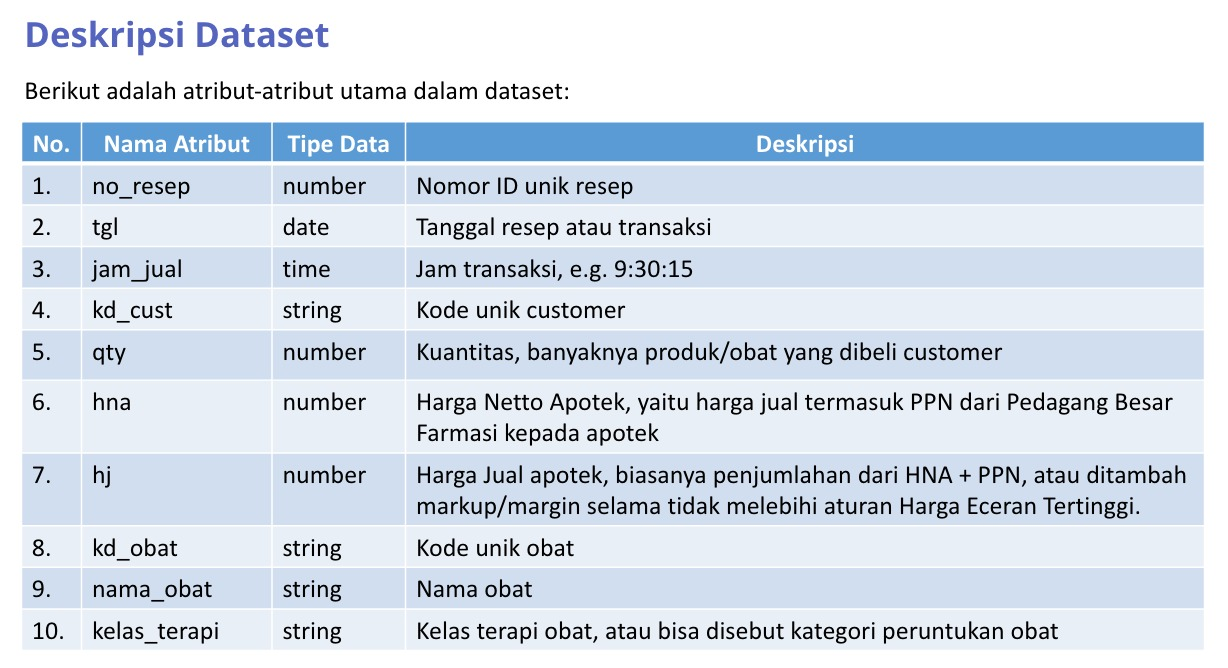

#**1a. Data Collection**

In [ ]:
import pandas as pd  #untuk mengelola dan menganalisis data dalm bentuk tabel/dataFrame
import numpy as np   #untuk melakukan operasi numerik
import seaborn as sns  #untuk visualisasi data statistik
import matplotlib.pyplot as plt  #untuk membuat grafik dan visualisasi data secara umum

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #import file dr goggle drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datmin/data-penjualan-apotek(in)  (1).csv", sep=';') #membaca dataset

<ipython-input-32-1f0c0a788ac4>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Datmin/data-penjualan-apotek(in)  (1).csv", sep=';') #membaca dataset


#**1b. EDA (Exploratory Data Analysis)**

In [ ]:
df

,Unnamed: 0,no_resep,tgl,kd_cust,jam_jual,kd_obat,qty,hna,hj,ppn_jual,nama_obat,waktu_transaksi,kelas_terapi
0,0,B-04.2015-01-0001,04/02/2015,UMUM,10:36:07,R-0625,6.0,760,1045,0,Diadium,04/02/2015 10:36,NaN
1,1,B-04.2015-01-0001,04/02/2015,UMUM,10:36:07,R-0528,8.0,203,279.125,0,Cotrimoxazole 480mg,04/02/2015 10:36,ANTIINFEKSI
2,2,B-04.2015-01-0001,04/02/2015,UMUM,10:36:07,AI-0354,6.0,123,162,0,Dexanta 350 mg tab,04/02/2015 10:36,NaN
3,3,B-04.2015-09-0001,4/21/2015,UMUM,17:48:41,R-4027,10.0,2112,2904,0,Micro Fen (BD),4/21/2015 17:48,NaN
4,4,B-04.2015-09-0002,4/22/2015,UMUM,17:16:48,R-1297,10.0,8360,11495,0,Lapicef 500mg,4/22/2015 17:16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411641,411641,RL-12.2015-67-0066,12/29/2015,L-12.2015-0769,13:42:25,R-4395,1.0,44000,60500,0,T-VIO 2-0,12/29/2015 13:42,NaN
411642,411642,RL-12.2015-67-0066,12/29/2015,L-12.2015-0769,13:42:25,R-2694,3.0,9070,12471,0,CHROMALUX TAB,12/29/2015 13:42,NaN
411643,411643,RL-12.2015-67-0066,12/29/2015,L-12.2015-0769,13:42:25,R-3967,2.0,2727,3750,0,Kasa Steril,12/29/2015 13:42,NaN
411644,411644,RL-12.2015-67-0067,12/31/2015,L-12.2015-0839,07:15:41,R-0695,1.0,10600,14575,0,Dumin Rectal Supp 125mg,12/31/2015 7:15,NaN


In [ ]:
df.head() #melihat 5 data diawal

,Unnamed: 0,no_resep,tgl,kd_cust,jam_jual,kd_obat,qty,hna,hj,ppn_jual,nama_obat,waktu_transaksi,kelas_terapi
0,0,B-04.2015-01-0001,04/02/2015,UMUM,10:36:07,R-0625,6.0,760,1045,0,Diadium,04/02/2015 10:36,NaN
1,1,B-04.2015-01-0001,04/02/2015,UMUM,10:36:07,R-0528,8.0,203,279.125,0,Cotrimoxazole 480mg,04/02/2015 10:36,ANTIINFEKSI
2,2,B-04.2015-01-0001,04/02/2015,UMUM,10:36:07,AI-0354,6.0,123,162,0,Dexanta 350 mg tab,04/02/2015 10:36,NaN
3,3,B-04.2015-09-0001,4/21/2015,UMUM,17:48:41,R-4027,10.0,2112,2904,0,Micro Fen (BD),4/21/2015 17:48,NaN
4,4,B-04.2015-09-0002,4/22/2015,UMUM,17:16:48,R-1297,10.0,8360,11495,0,Lapicef 500mg,4/22/2015 17:16,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411646 entries, 0 to 411645
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       411646 non-null  int64  
 1   no_resep         411646 non-null  object 
 2   tgl              411646 non-null  object 
 3   kd_cust          411646 non-null  object 
 4   jam_jual         411646 non-null  object 
 5   kd_obat          411646 non-null  object 
 6   qty              411646 non-null  float64
 7   hna              411646 non-null  object 
 8   hj               411646 non-null  object 
 9   ppn_jual         411646 non-null  int64  
 10  nama_obat        411646 non-null  object 
 11  waktu_transaksi  411646 non-null  object 
 12  kelas_terapi     289379 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 40.8+ MB


In [ ]:
#cek missing values (nilai kosong)
df.isnull().sum()

,0
Unnamed: 0,0
no_resep,0
tgl,0
kd_cust,0
jam_jual,0
kd_obat,0
qty,0
hna,0
hj,0
ppn_jual,0


In [ ]:
df.duplicated().sum() #cek duplikasi data

np.int64(0)

In [ ]:
df.dtypes #cek tipe data

,0
Unnamed: 0,int64
no_resep,object
tgl,object
kd_cust,object
jam_jual,object
kd_obat,object
qty,float64
hna,object
hj,object
ppn_jual,int64


In [ ]:
df.describe()

,Unnamed: 0,qty,ppn_jual
count,411646.000000,411646.000000,411646.000000
mean,205822.500000,10.025937,1.375818
std,118832.108792,35.207245,3.444609
min,0.000000,0.010000,0.000000
25%,102911.250000,2.000000,0.000000
50%,205822.500000,6.000000,0.000000
75%,308733.750000,10.000000,0.000000
max,411645.000000,12000.000000,10.000000


#**2a. Pre-Processing & Transformasi Data**

In [ ]:
df = df.dropna(subset=['kelas_terapi'])

In [ ]:
# Mengubah kolom 'tgl' menjadi tipe data datetime agar bisa diproses lebih lanjut (misalnya filter berdasarkan tanggal)
df['tgl'] = pd.to_datetime(df['tgl'])

# Mengubah kolom 'jam_jual' menjadi tipe data waktu (hh:mm:ss)
# Dengan format '%H:%M:%S' dan jika ada format yang salah, akan menghasilkan NaT (Not a Time)
df['jam_jual'] = pd.to_datetime(df['jam_jual'], format='%H:%M:%S', errors='coerce').dt.time

<ipython-input-41-8bf39b62a103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tgl'] = pd.to_datetime(df['tgl'])
<ipython-input-41-8bf39b62a103>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jam_jual'] = pd.to_datetime(df['jam_jual'], format='%H:%M:%S', errors='coerce').dt.time


In [ ]:
# Mengelompokkan data berdasarkan kode dan nama obat, lalu menjumlahkan total kuantitas (qty) yang terjual untuk setiap obat
penjualan_obat = df.groupby(['kd_obat', 'nama_obat'])['qty'].sum().reset_index()

# Mengurutkan hasil berdasarkan jumlah kuantitas terjual secara menurun (dari yang paling banyak terjual)
penjualan_obat_sorted = penjualan_obat.sort_values(by='qty', ascending=False)

In [ ]:
print(penjualan_obat_sorted.head(10))

     kd_obat                   nama_obat        qty
211  AI-0853            Metformin 500 mg  140991.00
228  AI-0943            Neurodex FC komb  135614.00
107  AI-0406                 Eclid 50 mg  127864.00
51   AI-0190         Candesartan TI 8 mg  111066.00
232  AI-0958  Nitrokaf Retard Forte 5 mg  107810.00
197  AI-0771          Lansoprazole 30 mg  104280.00
23   AI-0097                Aptor 100 mg   89029.00
215  AI-0860     Methylprednisolone 4 mg   74858.75
27   AI-0106       Asam Mefenamat 500 mg   68479.00
6    AI-0043          Allopurinol 100 mg   61147.00


In [ ]:
# Mengubah kolom 'hj' (Harga Jual) menjadi tipe data numerik,
df['hj'] = pd.to_numeric(df['hj'], errors='coerce')
# Mengubah kolom 'hna' (Harga Netto Apotek) menjadi tipe data numerik,
df['hna'] = pd.to_numeric(df['hna'], errors='coerce')
# Mengubah kolom 'qty' (Jumlah Penjualan) menjadi tipe data numerik,
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

<ipython-input-44-b8d04135dab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hj'] = pd.to_numeric(df['hj'], errors='coerce')
<ipython-input-44-b8d04135dab5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hna'] = pd.to_numeric(df['hna'], errors='coerce')
<ipython-input-44-b8d04135dab5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
# Menghapus baris yang memiliki nilai Null  pada kolom 'hj', 'hna', atau 'qty'
df = df.dropna(subset=['hj', 'hna', 'qty'])

In [ ]:
# Cek apakah ada nilai di kolom 'ppn_jual' yang tidak kosong
print(df['ppn_jual'].isnull().sum())  # Jumlah nilai kosong (NaN) di kolom 'ppn_jual'

# Cek apakah ada nilai unik di kolom 'ppn_jual'
print(df['ppn_jual'].unique())

0
[ 0 10]


In [ ]:
# Cek distribusi nilai pada kolom 'ppn_jual'
print(df['ppn_jual'].value_counts())

ppn_jual
0     246449
10     35387
Name: count, dtype: int64


In [ ]:
# Hitung rata-rata dari ppn_jual
mean_ppn = df['ppn_jual'].mean()

# Tampilkan rata-rata PPN
print(f"Rata-rata PPN: {mean_ppn}")

# Menghitung PPN berdasarkan rata-rata PPN yang baru
df['ppn'] = df['hna'] * mean_ppn / 100  # PPN baru dihitung berdasarkan rata-rata


Rata-rata PPN: 1.2555883563490824


In [ ]:
df['ppn'] = df['hna'] * 0.012555883563490824

<ipython-input-49-2c96c5697a19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppn'] = df['hna'] * 0.012555883563490824


#**2b. Feature Extraction**

In [ ]:
# Membuat kolom keuntungan per unit
df['keuntungan_per_unit'] = df['hj'] - df['hna'] - df['ppn']

# Membuat kolom total keuntungan (per transaksi)
df['keuntungan_total'] = df['keuntungan_per_unit'] * df['qty']

In [ ]:
# Melakukan agregasi data berdasarkan kode obat (kd_obat) dan nama obat (nama_obat)
summary = df.groupby(['kd_obat', 'nama_obat']).agg({
    'hna': 'mean',                      #hitung rata-rata Harga Netto Apotek (HNA) per obat
    'hj': 'mean',                       #hitung rata-rata Harga Jual (HJ) per obat
    'ppn': 'mean',                      #hitung rata-rata PPN per obat
    'keuntungan_per_unit': 'mean',     #hitung rata-rata keuntungan per unit obat
    'keuntungan_total': 'sum',         #jumlahkan total keuntungan dari seluruh transaksi obat tersebut
    'qty': 'sum'                        #jumlahkan total jumlah unit (qty) obat yang terjual
}).reset_index()

In [ ]:
# Lalu mengambil 10 baris teratas (10 obat dengan total keuntungan tertinggi)
top_obat_profit = summary.sort_values(by='keuntungan_total', ascending=False).head(10)

In [ ]:
# Top 10 obat paling laris berdasarkan qty
top_laris = df.groupby(['kd_obat', 'nama_obat'])['qty'].sum().sort_values(ascending=False).head(10).reset_index()
# Top 10 obat dengan total keuntungan tertinggi
top_untung = df.groupby(['kd_obat', 'nama_obat'])['total_untung'].sum().sort_values(ascending=False).head(10).reset_index()

#**3. Visualisasi**

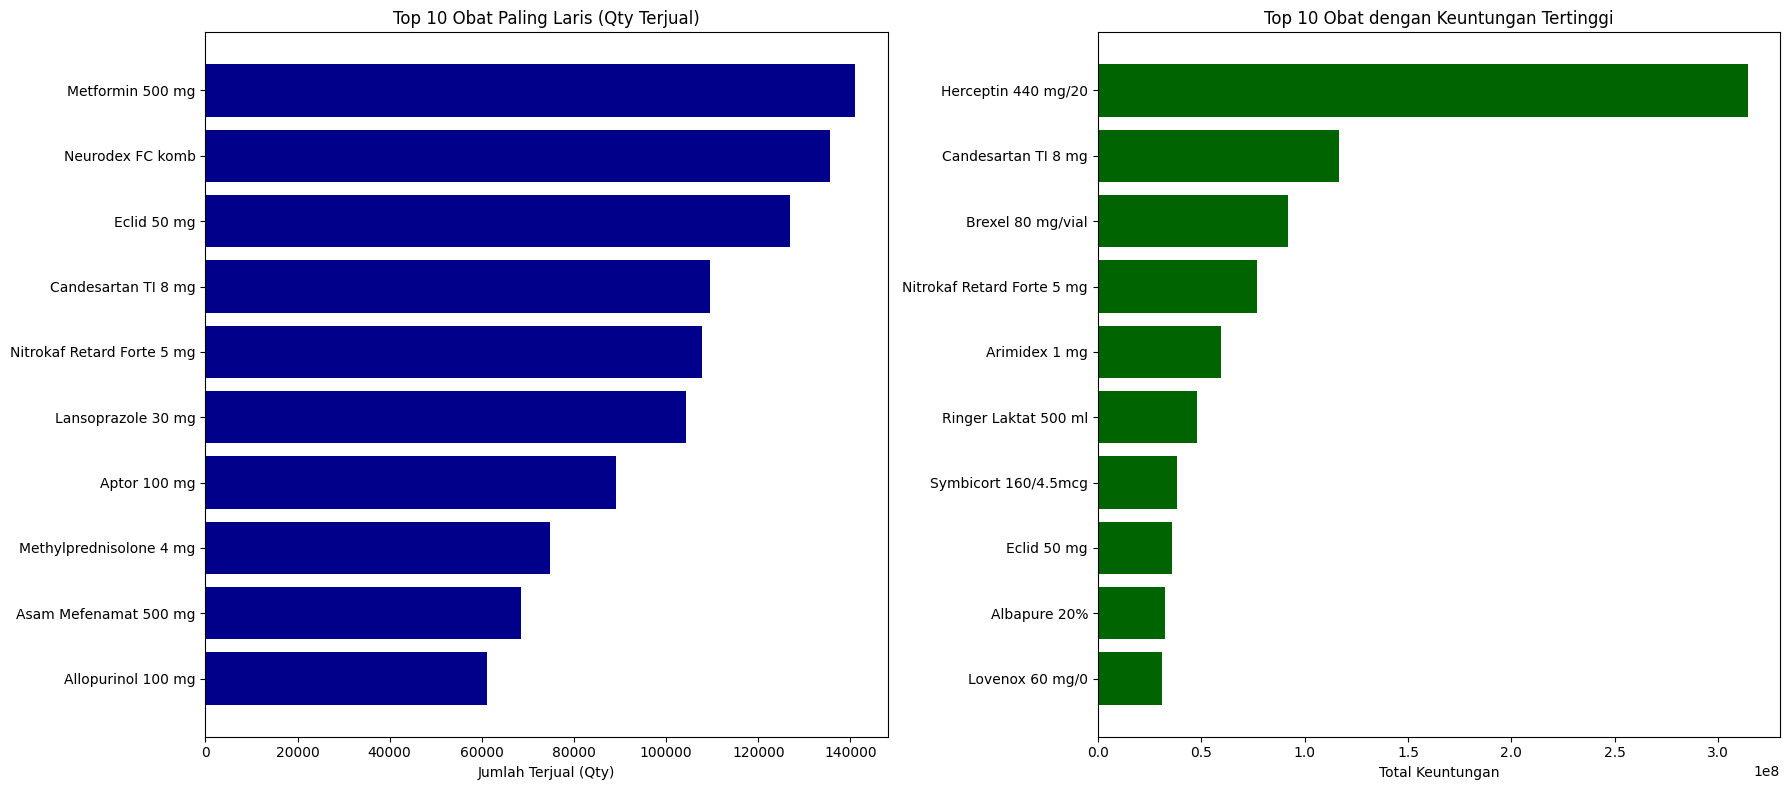

<Figure size 640x480 with 0 Axes>

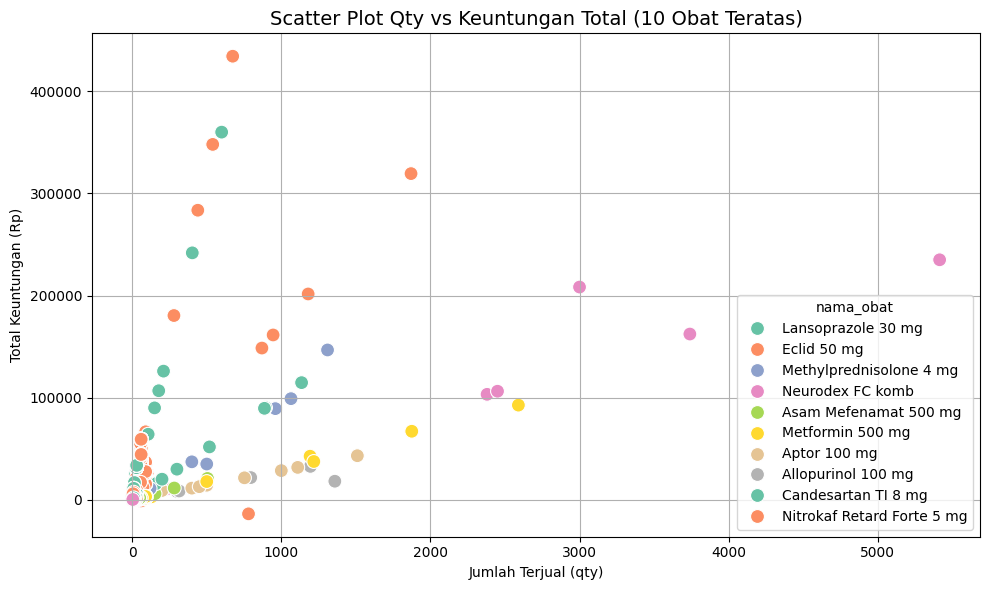

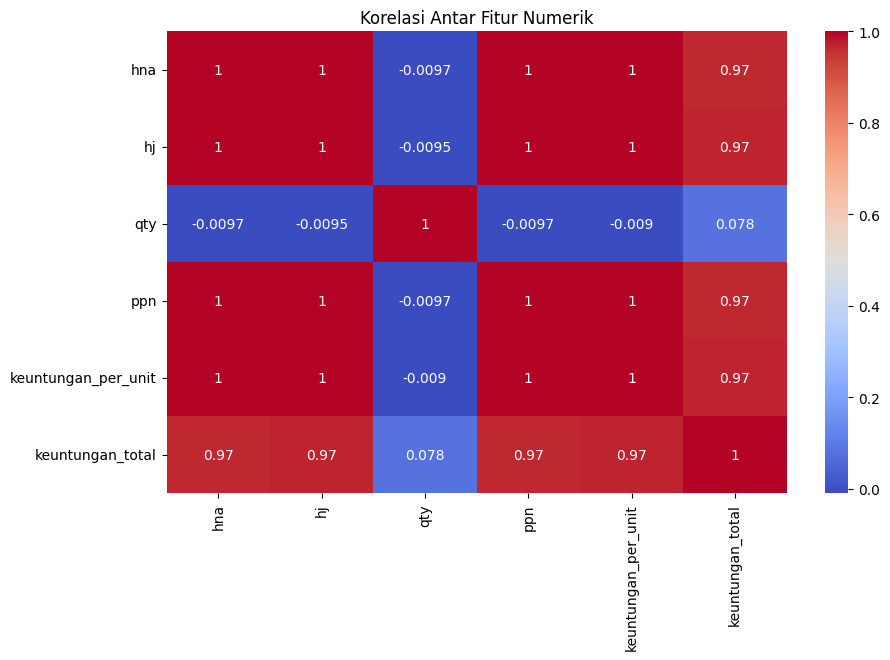

In [ ]:
# Visualisasi Gabungan: Obat Terlaris dan Keuntungan Tertinggi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Grafik obat paling laris
axes[0].barh(top_laris['nama_obat'], top_laris['qty'], color='darkblue')
axes[0].set_title('Top 10 Obat Paling Laris (Qty Terjual)')
axes[0].set_xlabel('Jumlah Terjual (Qty)')
axes[0].invert_yaxis()

# Grafik obat dengan keuntungan tertinggi
axes[1].barh(top_untung['nama_obat'], top_untung['total_untung'], color='darkgreen')
axes[1].set_title('Top 10 Obat dengan Keuntungan Tertinggi')
axes[1].set_xlabel('Total Keuntungan')
axes[1].invert_yaxis()


plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

# Batasi hanya top 10 untuk visualisasi scatter plot
top_names = top_laris['nama_obat'].tolist()
df_top = df[df['nama_obat'].isin(top_names)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top, x='qty', y='total_untung', hue='nama_obat', palette='Set2', s=100)
plt.title('Scatter Plot Qty vs Keuntungan Total (10 Obat Teratas)', fontsize=14)
plt.xlabel('Jumlah Terjual (qty)')
plt.ylabel('Total Keuntungan (Rp)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df[['hna', 'hj', 'qty', 'ppn', 'keuntungan_per_unit', 'keuntungan_total']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()
#jika mendekati 1, korelasi nya bagus, jika -1 korelasi nya buruk

# Tambahkan kolom bulan dan tahun
df['bulan'] = df['tgl'].dt.to_period('M')

# # Visualisasi penjualan per bulan
# monthly_sales = df.groupby('bulan')['qty'].sum()
# monthly_sales.plot(kind='line', figsize=(10, 4), marker='o', color='purple')
# plt.title('Total Penjualan Obat per Bulan')
# plt.xlabel('Bulan')
# plt.ylabel('Qty Terjual')
# plt.grid(True)
# plt.show()

# # Distribusi Harga Jual dengan skala log
# plt.figure(figsize=(8, 4))
# sns.histplot(np.log1p(df['hj']), kde=True, bins=30, color='green')
# plt.title("Distribusi Harga Jual (Log Scale)")
# plt.xlabel("Log Harga Jual")
# plt.show()

# # Distribusi Qty dengan skala log
# plt.figure(figsize=(8, 4))
# sns.histplot(np.log1p(df['qty']), kde=True, bins=30, color='blue')
# plt.title("Distribusi Jumlah Penjualan (Qty) (Log Scale)")
# plt.xlabel("Log Qty")
# plt.show()

#**KESIMPULAN**

Berdasarkan analisis data penjualan obat, dapat disimpulkan bahwa harga pokok (hna), harga jual (hj), dan PPN berperan penting dalam mempengaruhi total keuntungan yang dihasilkan. Harga jual yang lebih tinggi dengan harga pokok yang lebih rendah menghasilkan keuntungan yang lebih besar. Selain itu, penyesuaian tarif PPN juga memberikan dampak signifikan terhadap profitabilitas, sehingga perlu diperhatikan dalam strategi penetapan harga obat.

Selain itu, analisis juga menunjukkan adanya perbedaan antara obat yang terlaris dan obat yang memberikan keuntungan tertinggi. Beberapa obat meskipun tidak memiliki penjualan tertinggi, namun memiliki margin keuntungan yang lebih besar. Oleh karena itu, penting bagi apotek untuk tidak hanya fokus pada jumlah penjualan, tetapi juga mempertimbangkan keuntungan yang dihasilkan dari masing-masing produk untuk mengoptimalkan profitabilitas.
